# Clean And Analyze Employee Exit Surveys
## Introduction

We'll work with exit surveys from employees of the Department of Education, Training and Employment ([DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)) and the Technical and Further Education ([TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)) institute in Queensland, Australia. Dataquest has made some slight modifications to these datasets to make them easier to work with.

Let's try to answer these questions in this analysis:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Columns
### dete_survey.csv
- __ID__: An id used to identify the participant of the survey
- __SeparationType__: The reason why the person's employment ended
- __Cease Date__: The year or month the person's employment ended
- __DETE Start Date__: The year the person began employment with the DETE

### tafe_survey.csv
- __Record ID__: An id used to identify the participant of the survey
- __Reason for ceasing employment__: The reason why the person's employment ended
- __LengthofServiceOverall. Overall Length of Service at Institute (in years)__: The length of the person's employment (in years)



Let's start by reading the datasets into pandas and exploring them.

In [37]:
import numpy as np
import pandas as pd
import matplotlib

dete_survey = pd.read_csv('dete_survey.csv')
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [38]:
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='Latin1')
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    int64  
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41  45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [39]:
print(dete_survey.isnull().sum())
print(tafe_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

We can make some observations based on the information displayed above:

- There are some extra columns regarding to our analysis that migth be dropped.
- _dete_\__survey_ dataframe contains 'Not Stated' values, indicating missing values, non represented as Nan.
- Both datasets contain simmilar columns, with different names, it would be better to unify them.
- We'll need to further check which columns indicate dissatisfaction.

## Correction of NaN values

We can start by re-reading DETE dataset, but indicating 'Not Stated' values as 'NaN', to operate easily with it. Then, we will drop some columns that won't be necessary for our purposes.

In [40]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Renaming columns

Now we can move on to renaming columns in order to make both dataset compatibles.

|   dete_survey       |                                    tafe_survey                                |
|:---------------:    |    :-------------------------------------------------------------------------:|
|        ID           |                                     Record ID                                 |
|  SeparationType     |                           Reason for ceasing employment                       |
|    Cease Date       |                                   CESSATION YEAR                              |
| DETE Start Date     |     LengthofServiceOverall. Overall Length of Service at Institute (in years) |
|       Age           |                              CurrentAge. Current Age                          |
|      Gender         |                            Gender. What is your Gender?                       |

In [41]:
print('Original DETE columns')
print(dete_survey_updated.columns)

Original DETE columns
Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


In [42]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.replace(' ', '_').str.lower()
print('Updated DETE columns')
print(dete_survey_updated.columns)

Updated DETE columns
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [43]:
print('Original TAFE columns')
print(tafe_survey_updated.columns)

Original TAFE columns
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at cu

In [44]:
replacements = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
    }

tafe_survey_updated = tafe_survey_updated.rename(replacements, axis=1)

print('Updated TAFE columns')
print(tafe_survey_updated.columns)

Updated TAFE columns
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender.     What is your Gender?', 'CurrentAge.     Current Age',
       'Employment Type.     Employment Type',
       'Classification.     Classification', 'institute_service',
       'role_service'],
      dtype='object')


In [45]:
dete_survey_updated.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [46]:
tafe_survey_updated.head(3)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,role_service
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


## Column cleaning

Let's move onto cleaning unnecessary columns. 
We'll only analyze survey respondents who resigned, so their separation type contains the string _Resignation_. _dete_\__survey_\__updated_ dataframe contains multiple separation types: _Resignation-Other reasons_, _Resignation-Other employer_, _Resignation-Move overseas/interstate_. Let's see if there is another variation and make a separate dataset with resignation data only.

In [47]:
print(dete_survey_updated['separationtype'].value_counts())
print('\n')
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [48]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == ('Resignation-Other reasons'or'Resignation-Other employer'or'Resignation-Move overseas/interstate')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

## Checking date consistency

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies. In this step, we'll focus on verifying that the years in the __cease_date__ and __dete_start_date__ columns make sense. Since the __cease_date__ is the last year of the person's employment and the __dete_start_date__ is the person's first year of employment, it wouldn't make sense to have years after the current date. Also, given that most people in this field start working in their 20s, it's also unlikely that the __dete_start_date__ was before the year 1940.

In [49]:
dete_resignations['cease_date'].value_counts()

2012       63
2013       37
06/2013     9
12/2013     7
09/2013     6
07/2013     5
11/2013     4
01/2014     4
08/2013     3
05/2013     2
10/2013     2
05/2012     2
07/2012     1
Name: cease_date, dtype: int64

In [50]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")
dete_resignations['cease_date'].value_counts()

2013.0    75
2012.0    66
2014.0     4
Name: cease_date, dtype: int64

In [51]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0    1
1972.0    1
1973.0    1
1974.0    2
1976.0    2
1980.0    4
1983.0    2
1984.0    1
1985.0    1
1986.0    1
1987.0    1
1988.0    1
1989.0    2
1990.0    3
1991.0    2
1992.0    5
1993.0    5
1994.0    3
1995.0    2
1996.0    4
1997.0    2
1998.0    5
1999.0    4
2000.0    6
2001.0    1
2002.0    2
2003.0    2
2004.0    7
2005.0    7
2006.0    9
2007.0    6
2008.0    9
2009.0    4
2010.0    8
2011.0    9
2012.0    8
2013.0    5
Name: dete_start_date, dtype: int64

In [52]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

We could check that both dataset include correct values:
- Start years in __DETE__ between 1963 and 2013.
- Cease years in __DETE__ between 2012 and 2014.
- Cease years in __TAFE__ between 2009 and 2013.

Let's make years of services comparable by substracting start year to cease year.

In [53]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']

## Dissatisfaction causes

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

_tafe_\__survey_\__updated_
- __Contributing Factors. Dissatisfaction__
- __Contributing Factors. Job Dissatisfaction__

_dete_\__survey_\__updated_
- __job_dissatisfaction__
- __dissatisfaction_with_the_department__
- __physical_work_environment__
- __lack_of_recognition__
- __lack_of_job_security__
- __work_location__
- __employment_conditions__
- __work_life_balance__
- __workload__

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column. We'll convert __Contributing Factors. Dissatisfaction__ and __Contributing Factors. Job Dissatisfaction__ in _tafe_\__survey_\__updated_ to boolean (or NaN) values. This will lead to the criteria:

- Return _True_ if __any__ element in the selected columns above is _True_
- Return _False_ if __none__ of the elements in the selected columns above is _True_
- Return _NaN_ if the value is _NaN_

It might be noticed that this criteria is simmilar to a boolean __NOR__, but slightly adapted to a non-binary situation.

In [54]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [55]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Let's create a function that makes the changes:
- If the value is _NaN_, return _np.nan_.
- If the value is _'-'_, return _False_.
- For any other value, return _True_.

In [56]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True


tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [57]:
dete_resignations['dissatisfied'] = dete_resignations[[
       'job_dissatisfaction',
       'dissatisfaction_with_the_department',
       'physical_work_environment',
       'lack_of_recognition',
       'lack_of_job_security',
       'work_location',
       'employment_conditions',
       'work_life_balance',
       'workload'
       ]].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

True     89
False    61
Name: dissatisfied, dtype: int64

## Dataset combining
First we will create a column in each dataset to easily identify them while merged. Then, we will merge both datasets and drop columns with extensive NaN values.

In [58]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                2
aboriginal                                               3
nesb                                                     4
disability                                               8
business_unit                                           10
classification                                          70
region                                                 125
role_start_date                                        128
dete_start_date                                        138
gender                                                 147
position                                               148
age                                                    148
employment_status                                      148
career_move_to_private_sector                          150
none_of_the_above                                      150
workload                                               1

In [59]:
combined_updated = combined.dropna(thresh = 300, axis =1).copy()

We'll have to clean up the __institute_service__ column because it currently contains values in a couple different forms, so let's convert them into categories:
- __New__: Less than 3 years at a company
- __Experienced__: 3-6 years at a company
- __Established__: 7-10 years at a company
- __Veteran__: 11 or more years at a company

In [60]:
combined_updated['institute_service'].value_counts(dropna=False)

Less than 1 year      73
NaN                   67
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
1.0                   10
More than 20 years    10
0.0                    9
3.0                    9
5.0                    8
6.0                    8
9.0                    7
13.0                   7
8.0                    6
7.0                    6
20.0                   5
17.0                   5
4.0                    5
14.0                   4
15.0                   4
22.0                   3
2.0                    3
18.0                   3
21.0                   3
12.0                   2
16.0                   2
19.0                   2
32.0                   2
24.0                   2
39.0                   2
36.0                   2
23.0                   2
41.0                   1
38.0                   1
34.0                   1
33.0                   1
30.0                   1
31.0                   1


In [61]:
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
combined_updated['institute_service_up'].value_counts()

1.0     147
3.0      72
5.0      41
7.0      27
11.0     27
20.0     15
0.0       9
6.0       8
13.0      7
9.0       7
8.0       6
17.0      5
4.0       5
14.0      4
15.0      4
18.0      3
22.0      3
21.0      3
2.0       3
19.0      2
32.0      2
39.0      2
36.0      2
23.0      2
16.0      2
12.0      2
24.0      2
10.0      1
41.0      1
38.0      1
30.0      1
28.0      1
34.0      1
26.0      1
33.0      1
25.0      1
49.0      1
31.0      1
Name: institute_service_up, dtype: int64

Now we can convert them into the categories described above.

In [62]:
def service(value):
    if value >= 11:
        return "Veteran"
    elif 7 <= value < 11:
        return "Established"
    elif 3 <= value < 7:
        return "Experienced"
    elif pd.isnull(value):
        return np.nan
    else:
        return "New"


combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(service)
combined_updated['service_cat'].value_counts(dropna=False)

New            159
Experienced    126
Veteran         97
NaN             67
Established     41
Name: service_cat, dtype: int64

## Some Analysis
We'll replace the missing values in the _dissatisfied_ column with the most frequent value, _False_. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each _service_\__cat_ group and plot the results.

In [63]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    302
True     180
NaN        8
Name: dissatisfied, dtype: int64

<AxesSubplot:xlabel='service_cat'>

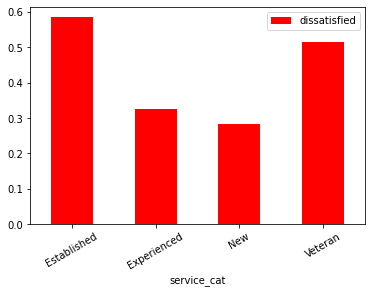

In [64]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
dis_pct.plot(kind='bar', rot=30, color='red')

We can assume that employees with 7+ service years are more likely to resign due to dissatisfaction while comparing to the younger.